In [4]:
%matplotlib inline
from os import listdir
from os.path import isfile, join
import pandas as pd
import seaborn as sns
import numpy as np
sns.set_context("notebook", font_scale=1.3)

path = "machina/sankoff/"
filenames = [join(path,f) for f in listdir(path) if isfile(join(path, f)) and f.endswith('.txt')]
colors= [ "#d1fffc", "#00ada4", "#edc9ff", "#ae00ff", "#ffc18c", "#d66300"]
sns.set_palette(colors)
pc_map = {'mS':0, 'pS': 1, 'mM': 2, 'pM': 3, 'mR': 4, 'pR': 5}

In [5]:
# %load parse.py
#!/usr/bin/python
import sys
from collections import Counter

def process(filename, m, patterns):
    s = filename.rstrip(".txt").split('/')[-1].split("_")
    
    try:
        sigma_max = int(s[0][-1])
    except:
        print filename
        print s
        raise
    if sigma_max != m: return None
    sim_pattern = s[1]
    #if sim_pattern != p: return None
    seed = int(s[2])
    res = []
    with open(filename) as f:
        f.readline()
        f.readline()
        d = [sigma_max, sim_pattern, seed] + [0]*len(patterns)
        for line in f:
            if line.startswith("Found"):
                #print line
                ss = line.rstrip("\n").split(" ")
                cnt = int(ss[1])
                inf_pattern = ss[-1]
                d[patterns.index(inf_pattern) + 3] += cnt
                
    return d

patterns = ['mS',  'pS', 'mM', 'pM', 'mR', 'pR', 'mPS', 'pPS']
l = []
m=8
for filename in filenames:
        res = process(filename, m, patterns)
        if res: 
            l.append(res)
from matplotlib import pyplot
df = pd.DataFrame(l, columns = ['sigma_max', 'sim_pattern', 'seed'] + patterns)

df['mS'] = df['mS'] + df['mPS']
df['pS'] = df['pS'] + df['pPS']

df_norm = pd.DataFrame()
df_norm = df[['sigma_max', 'sim_pattern', 'seed']]

patterns = ['mS',  'pS', 'mM', 'pM', 'mR', 'pR']
for pattern in ['mS',  'pS', 'mM', 'pM', 'mR', 'pR']:
    df_norm[pattern] = df.apply(lambda x: float(x[pattern])/sum(x[patterns]), axis=1)
df_norm['total'] = df.apply(lambda x: sum(x[patterns]), axis=1)
#df
#cmap = sns.color_palette("Set2", 10)
cmap = sns.color_palette()
#cmap = cmap[0:2] + cmap[4:5] + cmap[2:3]+cmap[5:6] + cmap[3:4]

for i, v in enumerate(['mS', 'S', 'M', 'R']):

    df_new = df_norm[df_norm['sim_pattern'] == v].sort_values(by='seed', ascending=False)
    df_new[patterns].plot(kind = 'barh', stacked=True, color= cmap)
    pyplot.xlabel('proportion')
    pyplot.yticks(range(0,10), df_new['seed'])
    pyplot.ylabel("seed")
    pyplot.xlim((0,1.2))
    pyplot.xticks(np.arange(0,1.2,0.2))
    counts = df_new['total']

    for j in range(10):
        pyplot.gca().annotate("[ "+str(counts.iloc[j])+" ]", xy=(1.01, j-0.15))
        
    pyplot.gca().legend(bbox_to_anchor=(0.95, 1.2), bbox_transform=pyplot.gca().transAxes, ncol=3, title="inferred pattern")
#     pyplot.tight_layout()
    pyplot.gcf().set_size_inches(5, 6)
    pyplot.savefig(v + "m"+str(m)+"_label.pdf", bbox_inches="tight")

    

ValueError: invalid literal for int() with base 10: '*'

/Users/melkebir/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/melkebir/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


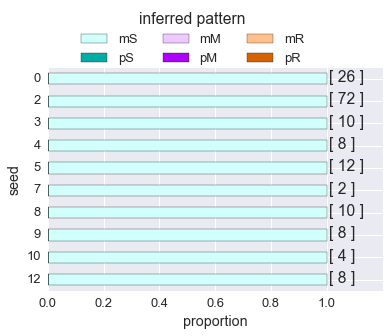

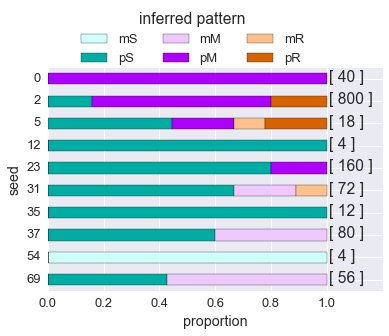

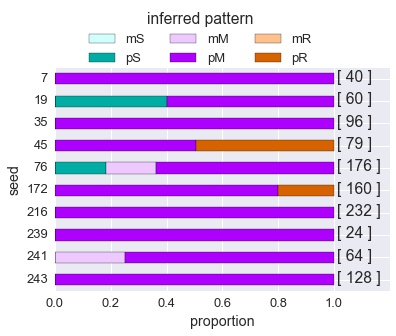

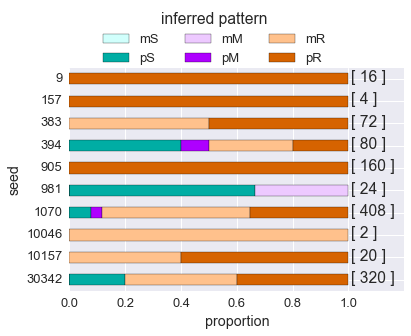

In [12]:
# %load parse.py
#!/usr/bin/python
import sys
from collections import Counter

def process(filename, m, patterns):
    s = filename.rstrip(".txt").split('/')[-1].split("_")
    
    try:
        sigma_max = int(s[0][-1])
    except:
        print filename
        print s
        raise
    if sigma_max != m: return None
    sim_pattern = s[1]
    #if sim_pattern != p: return None
    seed = int(s[2])
    res = []
    with open(filename) as f:
        f.readline()
        f.readline()
        d = [sigma_max, sim_pattern, seed] + [0]*len(patterns)
        for line in f:
            if line.startswith("Found"):
                #print line
                ss = line.rstrip("\n").split(" ")
                cnt = int(ss[1])
                inf_pattern = ss[-1]
                d[patterns.index(inf_pattern) + 3] += cnt
                
    return d

patterns = ['mS',  'pS', 'mM', 'pM', 'mR', 'pR', 'mPS', 'pPS']
l = []
m=8
for filename in filenames:
        res = process(filename, m, patterns)
        if res: 
            l.append(res)
from matplotlib import pyplot
df = pd.DataFrame(l, columns = ['sigma_max', 'sim_pattern', 'seed'] + patterns)

df['mS'] = df['mS'] + df['mPS']
df['pS'] = df['pS'] + df['pPS']

df_norm = pd.DataFrame()
df_norm = df[['sigma_max', 'sim_pattern', 'seed']]

patterns = ['mS',  'pS', 'mM', 'pM', 'mR', 'pR']
for pattern in ['mS',  'pS', 'mM', 'pM', 'mR', 'pR']:
    df_norm[pattern] = df.apply(lambda x: float(x[pattern])/sum(x[patterns]), axis=1)
df_norm['total'] = df.apply(lambda x: sum(x[patterns]), axis=1)
#df
#cmap = sns.color_palette("Set2", 10)
cmap = sns.color_palette()
#cmap = cmap[0:2] + cmap[4:5] + cmap[2:3]+cmap[5:6] + cmap[3:4]

for i, v in enumerate(['mS', 'S', 'M', 'R']):

    df_new = df_norm[df_norm['sim_pattern'] == v].sort_values(by='seed', ascending=False)
    df_new[patterns].plot(kind = 'barh', stacked=True, color= cmap)
    pyplot.xlabel('proportion')
    pyplot.yticks(range(0,10), df_new['seed'])
    pyplot.ylabel("seed")
    pyplot.xlim((0,1.2))
    pyplot.xticks(np.arange(0,1.2,0.2))
    counts = df_new['total']

    for j in range(10):
        pyplot.gca().annotate("[ "+str(counts.iloc[j])+" ]", xy=(1.01, j-0.15))
    #pyplot.gca().legend()    
    pyplot.gca().legend(bbox_to_anchor=(.8, 1.3), bbox_transform=pyplot.gca().transAxes, ncol=3, title="inferred pattern")
#     pyplot.tight_layout()
    pyplot.gcf().set_size_inches(6, 4)
    pyplot.savefig(v + "m"+str(m)+"_label.pdf", bbox_inches="tight")

    

/Users/melkebir/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/melkebir/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


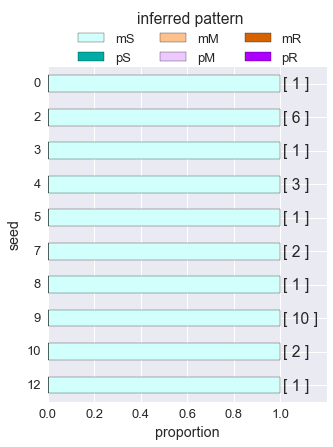

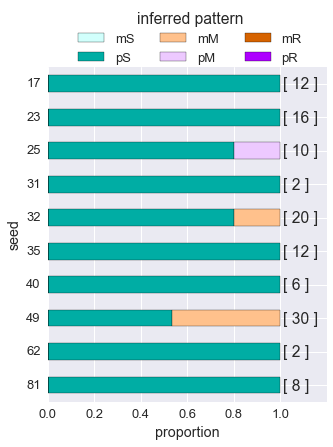

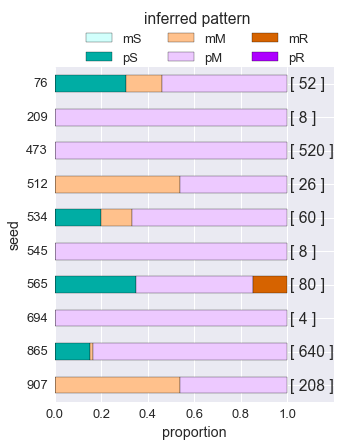

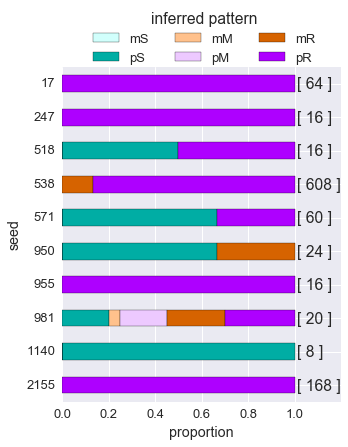

In [13]:
# %load parse.py
#!/usr/bin/python
import sys
from collections import Counter

def process(filename, m, patterns):
    s = filename.rstrip(".txt").split('/')[-1].split("_")
    
    try:
        sigma_max = int(s[0][-1])
    except:
        print filename
        print s
        raise
    if sigma_max != m: return None
    sim_pattern = s[1]
    #if sim_pattern != p: return None
    seed = int(s[2])
    res = []
    with open(filename) as f:
        f.readline()
        f.readline()
        d = [sigma_max, sim_pattern, seed] + [0]*len(patterns)
        for line in f:
            if line.startswith("Found"):
                #print line
                ss = line.rstrip("\n").split(" ")
                cnt = int(ss[1])
                inf_pattern = ss[-1]
                d[patterns.index(inf_pattern) + 3] += cnt
                
    return d
import seaborn as sns
patterns = ['mS',  'pS', 'mM', 'pM', 'mR', 'pR', 'mPS', 'pPS']
l = []
m=5
for filename in filenames:
        res = process(filename, m, patterns)
        if res: 
            l.append(res)
from matplotlib import pyplot
df = pd.DataFrame(l, columns = ['sigma_max', 'sim_pattern', 'seed'] + patterns)

df['mS'] = df['mS'] + df['mPS']
df['pS'] = df['pS'] + df['pPS']

df_norm = pd.DataFrame()
df_norm = df[['sigma_max', 'sim_pattern', 'seed']]

patterns = ['mS',  'pS', 'mM', 'pM', 'mR', 'pR']
for pattern in ['mS',  'pS', 'mM', 'pM', 'mR', 'pR']:
    df_norm[pattern] = df.apply(lambda x: float(x[pattern])/sum(x[patterns]), axis=1)
df_norm['total'] = df.apply(lambda x: sum(x[patterns]), axis=1)
#df
#cmap = sns.color_palette("Set2", 10)
cmap = sns.color_palette()
cmap = cmap[0:2] + cmap[4:5] + cmap[2:3]+cmap[5:6] + cmap[3:4]

for i, v in enumerate(['mS', 'S', 'M', 'R']):

    df_new = df_norm[df_norm['sim_pattern'] == v].sort_values(by='seed', ascending=False)
    df_new[patterns].plot(kind = 'barh', stacked=True, color= cmap)
    pyplot.xlabel('proportion')
    pyplot.yticks(range(0,10), df_new['seed'])
    pyplot.ylabel("seed")
    pyplot.xlim((0,1.2))
    pyplot.xticks(np.arange(0,1.2,0.2))
    counts = df_new['total']

    for j in range(10):
        pyplot.gca().annotate("[ "+str(counts.iloc[j])+" ]", xy=(1.01, j-0.15))
        
    pyplot.gca().legend(bbox_to_anchor=(0.95, 1.2), bbox_transform=pyplot.gca().transAxes, ncol=3, title="inferred pattern")
#     pyplot.tight_layout()
    pyplot.gcf().set_size_inches(5, 6)
    pyplot.savefig(v + "m"+str(m)+"_label.pdf", bbox_inches="tight")

    

/Users/melkebir/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/melkebir/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


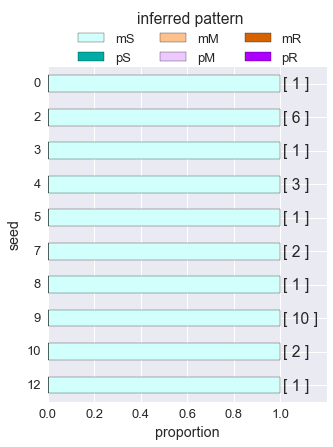

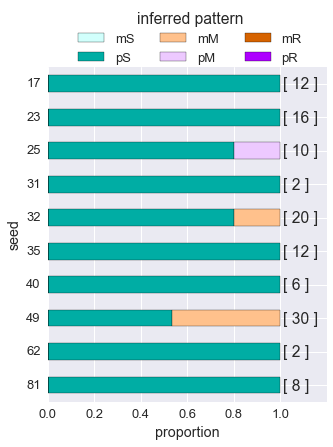

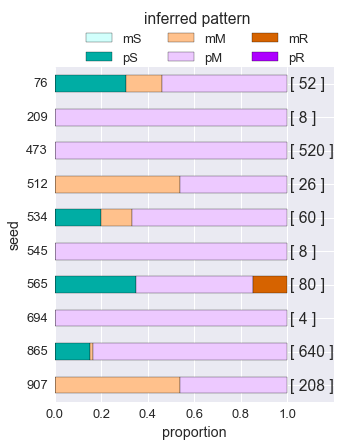

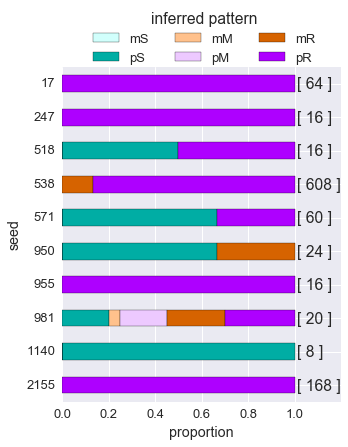

In [14]:
# %load parse.py
#!/usr/bin/python
import sys
from collections import Counter

def process(filename, m, patterns):
    s = filename.rstrip(".txt").split('/')[-1].split("_")
    
    try:
        sigma_max = int(s[0][-1])
    except:
        print filename
        print s
        raise
    if sigma_max != m: return None
    sim_pattern = s[1]
    #if sim_pattern != p: return None
    seed = int(s[2])
    res = []
    with open(filename) as f:
        f.readline()
        f.readline()
        d = [sigma_max, sim_pattern, seed] + [0]*len(patterns)
        for line in f:
            if line.startswith("Found"):
                #print line
                ss = line.rstrip("\n").split(" ")
                cnt = int(ss[1])
                inf_pattern = ss[-1]
                d[patterns.index(inf_pattern) + 3] += cnt
                
    return d
import seaborn as sns
patterns = ['mS',  'pS', 'mM', 'pM', 'mR', 'pR', 'mPS', 'pPS']
l = []
m=5
for filename in filenames:
        res = process(filename, m, patterns)
        if res: 
            l.append(res)
from matplotlib import pyplot
df = pd.DataFrame(l, columns = ['sigma_max', 'sim_pattern', 'seed'] + patterns)

df['mS'] = df['mS'] + df['mPS']
df['pS'] = df['pS'] + df['pPS']

df_norm = pd.DataFrame()
df_norm = df[['sigma_max', 'sim_pattern', 'seed']]

patterns = ['mS',  'pS', 'mM', 'pM', 'mR', 'pR']
for pattern in ['mS',  'pS', 'mM', 'pM', 'mR', 'pR']:
    df_norm[pattern] = df.apply(lambda x: float(x[pattern])/sum(x[patterns]), axis=1)
df_norm['total'] = df.apply(lambda x: sum(x[patterns]), axis=1)
#df
#cmap = sns.color_palette("Set2", 10)
cmap = sns.color_palette()
cmap = cmap[0:2] + cmap[4:5] + cmap[2:3]+cmap[5:6] + cmap[3:4]

for i, v in enumerate(['mS', 'S', 'M', 'R']):

    df_new = df_norm[df_norm['sim_pattern'] == v].sort_values(by='seed', ascending=False)
    df_new[patterns].plot(kind = 'barh', stacked=True, color= cmap)
    pyplot.xlabel('proportion')
    pyplot.yticks(range(0,10), df_new['seed'])
    pyplot.ylabel("seed")
    pyplot.xlim((0,1.2))
    pyplot.xticks(np.arange(0,1.2,0.2))
    counts = df_new['total']

    for j in range(10):
        pyplot.gca().annotate("[ "+str(counts.iloc[j])+" ]", xy=(1.01, j-0.15))
        
    pyplot.gca().legend(bbox_to_anchor=(0.95, 1.2), bbox_transform=pyplot.gca().transAxes, ncol=3, title="inferred pattern")
#     pyplot.tight_layout()
    pyplot.gcf().set_size_inches(5, 6)
    pyplot.savefig(v + "m"+str(m)+"_label.pdf", bbox_inches="tight")

    